In [6]:
# import pyforest
# print(pyforest.active_imports())
# set plt style
# plt.style.use('ggplot')

from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

mpl.rcParams["figure.figsize"] = (10, 6)
mpl.rcParams["axes.titlesize"] = 20
mpl.rcParams["axes.labelsize"] = 16
mpl.rcParams["axes.spines.top"] = False
mpl.rcParams["axes.spines.right"] = False
mpl.rcParams["xtick.labelsize"] = 14
mpl.rcParams["ytick.labelsize"] = 14

# 1.Load input and set output

In [2]:
inputFolder = Path("../data/0_raw")

GDRs = pd.read_excel(inputFolder / "V12_DR/V12_GDR_annotated_updated.xlsx")
Phenotype_categories = pd.read_excel(
    inputFolder / "Hayles_2013_OB_merged_categories.xlsx"
)

# merge the two dataframes
GDRs_with_phenotype_categories = pd.merge(
    GDRs.loc[:, :"GDL_50"],
    Phenotype_categories[
        [
            "Systematic ID",
            "Gene name",
            "Deletion mutant phenotype description",
            "Gene dispensability. This study",
            "Consistency at temperatures",
            "One or multi basic phenotypes",
            "Category",
        ]
    ],
    left_on="SysID",
    right_on="Systematic ID",
    how="left",
).drop(columns="Systematic ID")


outputFolder = Path("../results/GDR_vs_phenotype_categories")
outputFolder.mkdir(exist_ok=True)

# 2.Find the inconsistent genes between GDR and phenotype categories

In [3]:
phenotype_WT2E = GDRs_with_phenotype_categories[
    (GDRs_with_phenotype_categories["Category"] == "WT")
    & (GDRs_with_phenotype_categories["GDR_50"] > 0.5)
].copy()

phenotype_SmallColonies2E = GDRs_with_phenotype_categories[
    (GDRs_with_phenotype_categories["Category"] == "small colonies")
    & (GDRs_with_phenotype_categories["GDR_50"] > 0.5)
].copy()

phenotype_SmallColonies2severeE = GDRs_with_phenotype_categories[
    (GDRs_with_phenotype_categories["Category"] == "small colonies")
    & (GDRs_with_phenotype_categories["GDR_50"] > 0.75)
].copy()

# Save results

In [4]:
tmp_output = Path("../tmp/GDR_vs_phenotype_categories")
tmp_output.mkdir(exist_ok=True)

with pd.ExcelWriter(tmp_output / "GDRs_with_phenotype_categories.xlsx") as writer:
    GDRs_with_phenotype_categories.to_excel(
        writer, sheet_name="GDRs_with_phenotype_categories", index=False
    )
    phenotype_WT2E.to_excel(writer, sheet_name="WT (GDR>0.5)", index=False)
    phenotype_SmallColonies2E.to_excel(
        writer, sheet_name="small colonies (GDR>0.5)", index=False
    )
    phenotype_SmallColonies2severeE.to_excel(
        writer, sheet_name="small colonies (GDR>0.75)", index=False
    )

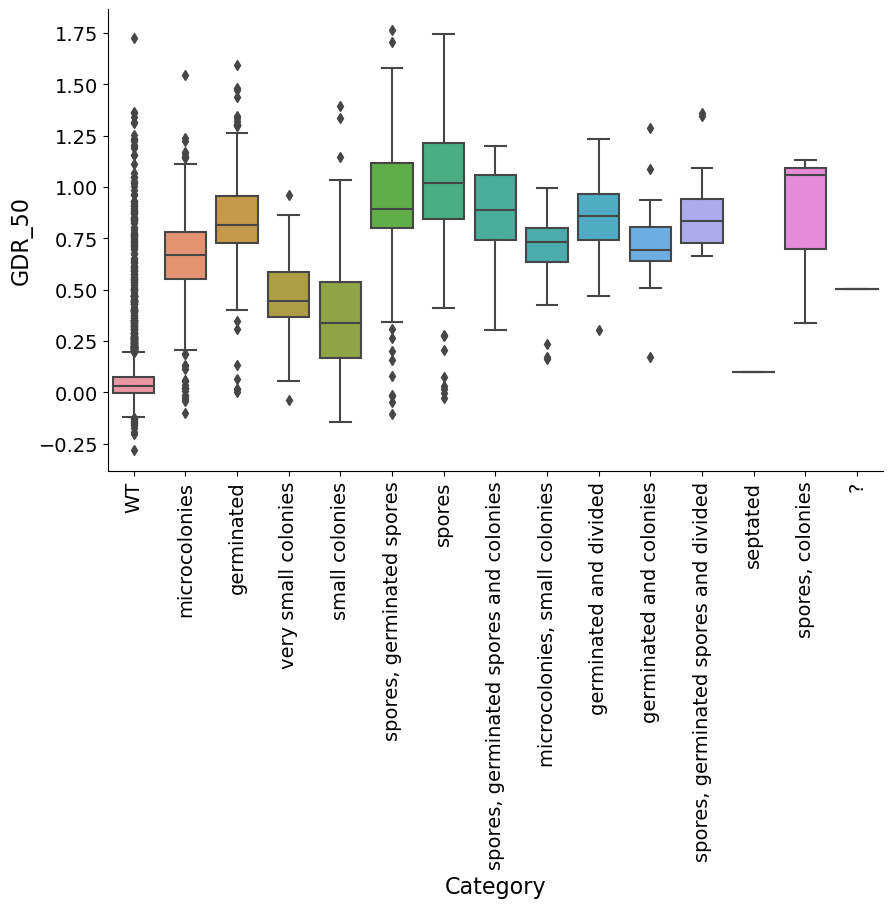

In [7]:
fig, ax = plt.subplots()


sns.boxplot(x="Category", y="GDR_50", data=GDRs_with_phenotype_categories, ax=ax)

# rotate x-axis labels
for tick in ax.get_xticklabels():
    tick.set_rotation(90)

plt.show()
plt.close()